In [66]:
import pandas as pd
from seaborn import *
import matplotlib.pyplot as plt
import random
plt.show()
%matplotlib inline 

/bin/sh: conda: command not found


In [27]:
sequence = "ACTGATCGTAGCAGTA"

In [28]:
#creating the markov chain

#generates a sequence with induced misses
#input probability list with the structure: [Pr(initial deletion), Pr(deletion-deletion), Pr(nuc-deletion)]
probList = [50, 56, 35]
def markovChain(sequence, probabilityList):
    newSequence = ""
    for i in sequence:
        #for the very first value of the generated sequence
        if not newSequence:
            #initial sequence probability
            init_random = random.randint(1, 100)
            if init_random > probabilityList[0]:
                #del
                newSequence += "-"
            else:
                #write
                newSequence += i

        #for the rest of the generated values in the new sequence
        elif newSequence[-1] is "-":
            del_random = random.randint(1, 100)
            if del_random <= probabilityList[1]:
                #write
                newSequence += i
            else:
                #delete
                newSequence += "-"

        else:
            nt_random = random.randint(1, 100)
            if nt_random > probabilityList[2]:
                #deletion
                newSequence += "-"
            else:
                #write
                newSequence += i
    return newSequence


In [29]:
#n = size of dataset
def createData(n, sequence):
    data = []
    for i in range(n):
        data.append(markovChain(sequence, probList))
    checkSumList = list(map(checkSum, data))
    data = list(zip(checkSumList, data))
    return data

In [30]:
def checkSum(sequence):
    sum = 0
    sumDict = {"A": 5, "G": 10, "C": 15, "T":20}
    for i in range(len(sequence)):
        if sequence[i] is not "-":
            sum += i*sumDict[sequence[i]]
    return sum

In [43]:
true_checkSum = checkSum(sequence)
#getting checksums of all sequences in the data list 
data = createData(10000, sequence)


The true checksum is: 1380


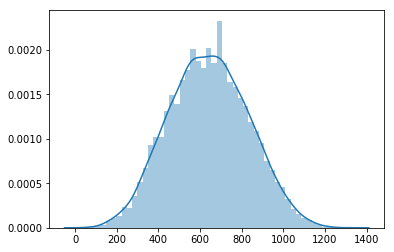

In [44]:
print("The true checksum is: " + str(true_checkSum))
checksums = list(map(lambda x : x[0], data))

ax = sns.distplot(checksums)

In [45]:
#this function returns the number of strands needed to reconstruct a full sequence given a 
#lower bound and an upper bound 
#important things to note: 
#returns 0 if there are no strands in a dataset within the given bounds, function
#returns 10,000 (arbitrarily large number) if strand unable to be fully reconstructed using the strands within given 
#bounds
def strandSimulation(lowerBound, upperBound, zippedCheckSumList):
    #generate list based on bounds
    tight = []

    for checkSum in zippedCheckSumList:
        if checkSum[0] > lowerBound and checkSum[0] < upperBound:
            tight.append(checkSum)
    #have generated sequence be the first in the tightened list
    if not tight:
        return 0
    generSeq = tight[0][1]

    #keep track of number of strands needed
    count = 1

    while "-" in generSeq:
        if count >= len(tight):
            return len(zippedCheckSumList)
        currStrand = tight[count][1]
        for i in range(len(currStrand)):
            if (generSeq[i] is "-") and (currStrand[i] is not "-"):
                generSeq = generSeq[:i] + currStrand[i] + generSeq[i+1:]
        count += 1
    return count

In [48]:
#generating figure for sliding window across 0-1600
def reconstructionAnalysis(sequence):
    
    #getting windows from 0 to 1675 in increments of 25
    windows = list(range(0, 1700, 25))
    simulatedData = []
    for num in windows:
        strandNums = []
        for i in range(10):
            if num is not 0:
                data = createData(10000, sequence)
                simNum = strandSimulation(num-150, num, data)
                print(str(i) + ": " + str(simNum))
                strandNums.append(simNum)
        if num is 0:
            simulatedData.append(0)
        else:
            average = sum(strandNums)/len(strandNums)
            print(str(num) + ": " + str(average))
            simulatedData.append(average)
    df1 = pd.DataFrame({'windows': windows})
    df2 = pd.DataFrame({'# strands': simulatedData})
    df = pd.concat([df1, df2], axis = 1)
    return df

In [49]:
#this takes a while, but you can see what's happening in real=time bc of the print statements 
data = reconstructionAnalysis(sequence)

#right now, I'm taking out all datapoints where the # of strands needed is greater than 1,000 
#because it kinda messes up the pattern (not sure how to deal with this). The reason why some data
#points are greater than 1000 is because in at least one of the 10 runs, the strand wasn't able to be fully reconstructed
#using the strands with checksums within the given sliding window bounds. 


0: 0
1: 10000
2: 0
3: 10000
4: 0
5: 0
6: 10000
7: 0
8: 0
9: 10000
25: 4000
0: 10000
1: 0
2: 10000
3: 10000
4: 10000
5: 0
6: 10000
7: 0
8: 0
9: 10000
50: 6000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
75: 10000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
100: 10000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
125: 10000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
150: 10000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
175: 10000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
200: 10000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
225: 10000
0: 10000
1: 10000
2: 10000
3: 10000
4: 10000
5: 10000
6: 10000
7: 10000
8: 10000
9: 10000
250: 10000
0: 10000
1: 10000
2: 10000
3: 10000

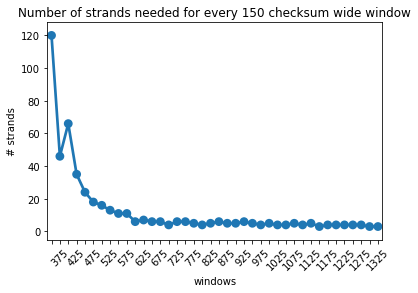

In [81]:
data_edit = data[(data['# strands'] < 1000) & (data['# strands'] != 0)]
ax = sns.pointplot(x = "windows", y = "# strands", data = data_edit)
ax.set_title("Number of strands needed for every 150 checksum wide window")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)    
    